# Lab Week 16: Working with impulse responses

### 1 March 2017

# Goals #

After doing this lab, you should be able to:
* Use convolution to apply other effects for a specific impulse response
* Use listening, plotting waveforms, and plotting spectra to reason about the effects of convolution with an impulse response

# 0.1. Are you caught up on labs?

By now, you should find it easy to:

1. Synthesize a sine wave with an arbitrary amplitude, frequency, and phase offset, then play that wave back. If you don't know how to to this, revisit Lab 12 (https://learn.gold.ac.uk/mod/resource/view.php?id=407662)
2. Compute and plot an FFT of an arbitrary 1-dimensional signal (e.g. an audio wave). If you don't know how to do this, revisit Lab 13 (https://learn.gold.ac.uk/mod/resource/view.php?id=408557)
3. Use the spectrum computed by the FFT to reason about the frequencies in a sound (Lab 14: https://learn.gold.ac.uk/mod/resource/view.php?id=409585)

__Don't forget that you may be asked about using Jupyter and Python for this type of synthesis and analysis on the exam, so now is the time to try it out and ask for help if you have problems!__

# 0.2 Load audio files into Python variables #

These are the same files as you used in last week's lab, so you may have them on your computer already! If so, just make sure they're copied to the same directory as this Notebook file.


a. Download the following audio files and store them in the same directory as this lab file:
* http://www.doc.gold.ac.uk/~mas01rf/PMC2014-15/IPython/lab14/noise.wav
* http://www.doc.gold.ac.uk/~mas01rf/PMC2014-15/IPython/lab14/robot.wav
* http://www.doc.gold.ac.uk/~mas01rf/PMC2014-15/IPython/lab14/saw.wav
* http://www.doc.gold.ac.uk/~mas01rf/PMC2014-15/IPython/lab14/sinMandolin1.wav
* http://www.doc.gold.ac.uk/~mas01rf/PMC2014-15/IPython/lab14/sinMandolin2.wav
* http://www.doc.gold.ac.uk/~mas01rf/PMC2014-15/IPython/lab13/song1.wav

(This last one is an exceprt downloaded from 

http://freemusicarchive.org/music/Jahzzar/Travellers_Guide/Siesta)

b. Now load them into variables:

In [ ]:
noise = wavReadMono("noise.wav")
robot = wavReadMono("robot.wav")
saw = wavReadMono("saw.wav")
sinMandolin1 = wavReadMono("sinMandolin1.wav")
sinMandolin2 = wavReadMono("sinMandolin2.wav")
song1 = wavReadMono("song1.wav")

In [ ]:
#Listen to them if you'd like:
play(song1)

# Part 1: Using Convolution for Audio Effects #

*Part 1 here duplicates Part 3 of last week's lab. If you did this already, please initialise your variables using the code below before skipping to Part 2*

As we saw in lecture last week, many audio effects ("systems") are applied by __convolving a sound with a special signal, called an impulse response__.

Run the code below to specify two impulse response signals, `h1` and `h2`. Notice that these signals are simply __arrays__.

In [2]:
h1 = [0.5, 0.5]
h2 = [1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10]

Make sure you've run the code in Part 0.2 to load audio clips into `song1` and `noise`. Then run the code below to apply the simple effects represented by `h1` and `h2` to `song1` and `noise`: 

In [ ]:
song1_h1 = convolve(song1, h1)
song1_h2 = convolve(song1, h2)
noise_h1 = convolve(noise, h1)
noise_h2 = convolve(noise, h2)

Now listen to `song1`, `song1_h1`, and `song1_h2`. Do you hear a difference? If so, what?


In [ ]:
play(song1)
play(song1_h1)
play(song1_h2)

Now listen to `noise`, `noise_h1`, and `noise_h2`. Do you hear a difference? If so, what?

In [ ]:
play(noise)
play(noise_h1)
play(noise_h2)

Plot the first 100 samples of `song1`, `song1_h1`, and `song1_h2`. How do they compare?

In [ ]:
#fill this in and discuss how they compare
plot(...
plot(...
plot(...

Now do the same thing for the first 100 samples of `noise`, `noise_h1`, and `noise_h2`. What is the relationship between them?

In [ ]:
# fill this in and discuss the relationship between these signals
plot(...
plot(...
plot(...

In general, what effects do convolving a sound with `h1` and `h2` seem to have on the waveforms?

Write your answer here (double-click to edit)

Now compare the __spectra__ of `song1`, `song1_h1`, and `song1_h2`, as well as the spectra of `noise`, `noise_h1`, and `noise_h2`.

In [ ]:
#Plot and compare the spectra here

In general, what effects do convolving a sound with `h1` and `h2` seem to have on the spectra?

Write your answer here (double-click to edit)

# Part 2: Reasoning about filters h1 and h2 #

If `h1` is the impulse response for a system H1, what type of system is H1?

Likewise, if `h2` is the impulse response for a system H2, what type of system is H2? 

In this section, we will look at the __spectra__ of `h1` and `h2` to understand that they are both functioning as __low-pass filters__.

Start by ensuring that `h1`, `h2`, `noise`, `song1`, `song1_h1`, `song1_h2`, `noise_h1`, and `noise_h2` are still initialised from Part 1, above, by running those cells if you haven't already. 

Let's take a look at the FFT of `h1`. Note that `h1` is only 2 samples long, and a 2-point FFT doesn't give us that much information!

However, remember that we can assume that a signal has a value of 0 for any time point not explicitly specified, so we could equivalently set `h1` to be equal to [0.5, 0.5, 0.0] or to [0.5, 0.5, 0.0, 0.0, 0.0], etc.

Let's make a new variable, `h1_1024`, that is a 1024 sample long version of `h1`:

In [14]:
h1_1024 = concatenate([h1, zeros(1022)])
print "h1_1024 is now: ", h1_1024, ", with length ", size(h1_1024)

h1_1024 is now:  [ 0.5  0.5  0.  ...,  0.   0.   0. ] , with length  1024


Now, compute and plot the FFT of `h1_1024`, remembering to plot only the first 512 elements:

*Hint: Your spectrum should look like <a href = "http://www.doc.gold.ac.uk/~mas01rf/PMC2016-17/lab16/h1_spectrum.png">this</a>. If it doesn't, try to figure out where you went wrong before going on!*|

Note that the magnitude of the FFT bins is near 1 for the lower-frequency bins (i.e., near 0 Hz), and drops off to 0 for the higher-frequency bins (i.e., those near the Nyquist rate). 

Why is this important? __It turns out that convolving an input signal with an impulse response computes a new signal, whose spectrum is equal to the input signal's spectrum multiplied, bin-by-bin, with the spectrum of the impulse response!!__ 

Now plot the spectrum of `noise` on one plot, and the spectrum of `
noise_h1` on a second plot. Note the similarity in shape between the spectrum of `noise_h1` and the spectrum of `h1`!

In [ ]:
#plot the spectrum of noise, up to the nyquist

In [20]:
#plot the spectrum of noise_h1, up to the nyquist

*Hint: The spectrum of `noise_h1` should look like <a href = "http://www.doc.gold.ac.uk/~mas01rf/PMC2016-17/lab16/noise_h1_spectrum.png">this</a>. If it doesn't, figure out where you went wrong before going on.*

Notice that the spectrum of `filtered_noise_h1` looks like you've multiplied, bin-by-bin, the spectrum of `noise` and the spectrum of `h1`.

So, let's say it again:

# <font color = "red">Convolving an input signal with an impulse response yields an output signal whose spectrum is equal to the input signal's spectrum multiplied bin-by-bin with the impulse response's spectrum!</font> #

Now, repeat the process with `h2`:

In [ ]:
#Make a new variable, h2_1024, that is a 1024 sample long version of h2:
h2_1024 = concatenate([h2, zeros(1014)])
print "h2_1024 is now: ", h2_1024, ", with length ", size(h2_1024)

#Plot the spectrum of h2_1024:


In [ ]:
#Now plot the spectrum of noise_h2 and compare its shape to h2_1024

Finally, repeat this process, trying to understand how the spectra of `song1` and `h1` combine to create the spectrum of `song1_h1`. Repeat again with `song1`, `h2`, and `song1_h2`. 

It should now be apparent to you that `h1` and `h2` are acting as __low-pass filters__. That is, lower frequencies __pass through__ relatively unchanged, but higher frequencies are reduced in magnitude or cut out completely.

### Part 3: Another filter #
a. Create a new filter whose impulse response `h3` is [-1, 1].

b. Plot the frequency response of `h3` (don't forget to add 0s to the end, and don't forget to plot only up until the Nyquist rate!)

__ What kind of filter is h3? __

__ What do you think the perceptual effect of h3 will be on your sounds? __

*Double-click here to edit and add your answers*

c. Apply h3 to the sounds `noise`, `robot`, and `saw`.

__ You will need to renormalize each of your sounds after filtering so that they don't contain any values less than -1 or more than 1! __

Use the following approach:

In [27]:
#convolve as usual
tmp = convolve(noise, h3)

#normalize: divide by the maximum absolute value in the signal:
noise_h3 = tmp / (max(abs(tmp)))

#repeat for robot and saw


d. Plot the spectra for these new sounds and compare them to the spectrum of h3.

In [ ]:
# your work here

__ e. If you're interested in experimenting more with simple audio filters, try applying h1, h10, and h3 to the other sounds you loaded in above. Listen to the filtered results and plot the spectra of the filtered signals. __

# Bonus Material #

If you've gotten this far, great! Here are a few things you should know:

1. The spectrum of a system's impulse response is called its "frequency response." The magnitude of each bin in this spectrum tells us how that frequency will be scaled by the system, for any new input. 
2. We can also look at the __phase__ of each spectral bin, which tells us how much that frequency will be shifted in phase by the system, for any new input.
3. Python provides you built-in functions to plot the magnitude and phase responses for a filter. 

For instance the function `signal.freqz` computes the frequency response for a filter, which can easily be plotted.

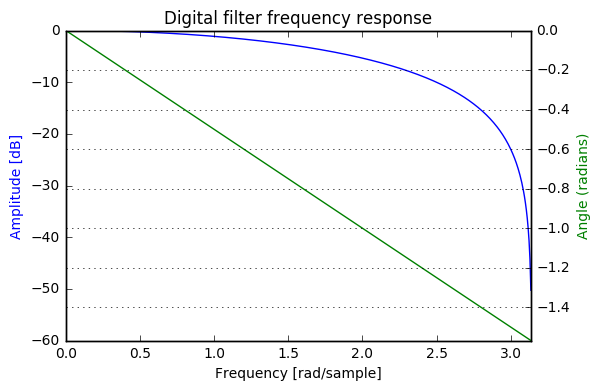

In [3]:
w, h = signal.freqz(h1) #get frequency response for h1
fig = plt.figure()
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)

plt.plot(w, 20 * np.log10(abs(h)), 'b') #plot in dB scale, wow!
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.show()

Furthermore, Python gives you tools that can help you *design* new filters with desired properties.

For instance, the function `signal.firwin` allows you to build low-pass, high-pass, band-pass, band-stop, and multi-band filters! Read the documentation, making sure you scroll all the way down to see the example code for each filter type: 

In [3]:
?signal.firwin

You can also find great third-party libraries to help with filter design and plotting. For example check out http://mpastell.com/2010/01/18/fir-with-scipy/ (requires you to download http://files.mpastell.com/FIR_design.py and run the function definitions there)

In [ ]:
# HAVE FUN NOW